# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df['date_formatted'] = pd.to_datetime(df['date'])

In [7]:
# clean up the house with 33 bedrooms, set it equal to 3
df['bedrooms_clean'] = df['bedrooms']
df['bedrooms_clean'] = df['bedrooms_clean'].replace({33:3})
df['bedrooms_clean'].value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms_clean, dtype: int64

In [48]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_formatted',
       'bedrooms_clean'],
      dtype='object')

In [109]:
features=['bathrooms', 'sqft_living',  # excl id and bedrooms, 'date', 
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', # 'date_formatted',
       'bedrooms_clean']

df_features = df[features]

target = df['price']

## Correlation coefficients

In [114]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [115]:
# Create correlation matrix
corr_matrix = X_train_8.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_clean
bathrooms,NaN,0.754353,0.078504,0.492800,0.072574,0.188267,0.123807,0.664316,0.684122,0.288169,0.507678,0.051492,0.193006,0.021930,0.215522,0.565778,0.074053,0.525995
sqft_living,NaN,NaN,0.168833,0.351500,0.121827,0.285025,0.062317,0.760049,0.874431,0.442037,0.316571,0.052999,0.187331,0.051552,0.228677,0.751843,0.170894,0.586839
sqft_lot,NaN,NaN,NaN,0.004269,0.016966,0.077697,0.010798,0.116790,0.181008,0.012922,0.054997,0.005931,0.126555,0.088823,0.219890,0.148123,0.730340,0.030560
floors,NaN,NaN,NaN,NaN,0.026498,0.025216,0.257399,0.456882,0.526344,0.249500,0.481202,0.008334,0.058942,0.045221,0.124712,0.277224,0.010396,0.179315
waterfront,NaN,NaN,NaN,NaN,NaN,0.418471,0.006766,0.096860,0.083276,0.096845,0.020006,0.094712,0.033314,0.006153,0.039215,0.098347,0.024004,0.007167
view,NaN,NaN,NaN,NaN,NaN,NaN,0.040953,0.251795,0.164209,0.283196,0.046915,0.092113,0.090405,0.008581,0.073212,0.283037,0.069932,0.078216
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145388,0.157424,0.162766,0.363959,0.060430,0.005186,0.013361,0.109302,0.093753,0.011136,0.016175
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.755676,0.167599,0.448011,0.011643,0.179040,0.116612,0.191478,0.713230,0.114429,0.363436
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048646,0.420815,0.025760,0.255650,0.002408,0.334193,0.728536,0.186486,0.487800
sqft_basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126299,0.061486,0.086999,0.110586,0.147097,0.200885,0.007038,0.306275


<AxesSubplot:>

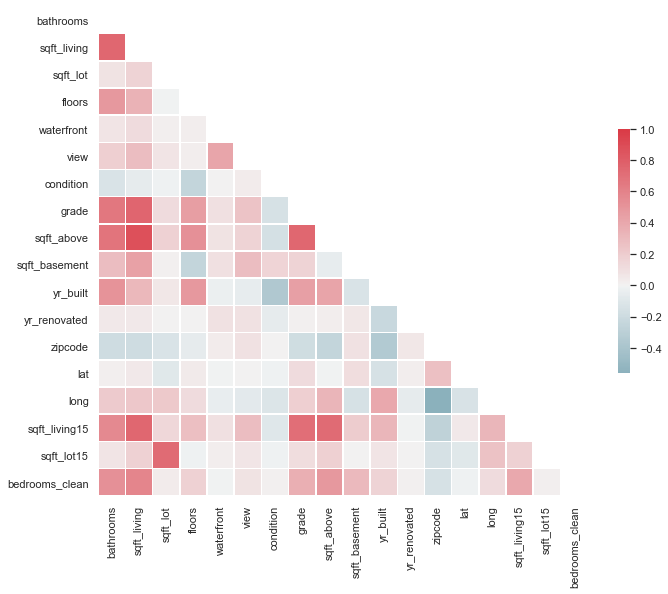

In [116]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_train_8.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [117]:
# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_8.drop(columns=to_drop, inplace=False)
X_test_8.drop(columns=to_drop, inplace=False)

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_clean
13347,2.75,1610,11201,1.0,0,0,5,7,590,1982,0,98033,47.7024,-122.198,1610,9000,4
12171,2.00,1610,13309,1.0,0,0,4,7,0,1967,0,98042,47.3398,-122.133,1610,15725,3
5900,1.75,1900,5520,1.0,0,0,3,7,620,1982,0,98118,47.5549,-122.292,1330,5196,3
7160,3.50,2690,5564,2.0,0,0,3,7,0,2007,0,98038,47.3537,-122.018,2210,4046,4
13494,1.75,1170,8740,1.0,0,0,4,7,0,1968,0,98052,47.6849,-122.117,1870,8448,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2.25,1900,10950,1.0,0,0,4,7,500,1959,0,98032,47.3582,-122.284,1700,11850,4
11094,2.50,1870,8190,1.0,0,0,3,7,770,1977,0,98058,47.4521,-122.161,1590,9150,4
5004,2.25,2320,8760,1.0,0,0,4,8,1160,1966,0,98032,47.3627,-122.285,1970,8690,4
5925,3.25,1530,1786,2.0,0,0,3,8,330,2007,0,98117,47.6783,-122.366,1390,2900,3


In [118]:
to_drop
# ['sqft_above'] is correlated with 'sqft_living'
# ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15'] to drop if .70 threshold is used
# ['sqft_living', 'grade', 'sqft_above', 'sqft_living15'] to drop if .75 threshold is used

['sqft_above']

## Variance Inflation Factor (VIF)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,28.5,bathrooms
1,inf,sqft_living
2,2.3,sqft_lot
3,16.8,floors
4,1.2,waterfront
5,1.6,view
6,34.5,condition
7,148.2,grade
8,inf,sqft_above
9,inf,sqft_basement


In [126]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features_base.values, i) for i in range(df_features_base.shape[1])]
vif["features"] = df_features_base.columns
vif.round(1)

,VIF Factor,features
0,28.5,bathrooms
1,37.4,sqft_living
2,2.3,sqft_lot
3,16.8,floors
4,1.2,waterfront
5,1.6,view
6,34.5,condition
7,148.2,grade
8,2.8,sqft_basement
9,9550.1,yr_built


In [113]:
df_features.corrwith(target).abs()

bathrooms         0.524335
sqft_living       0.703540
sqft_lot          0.086803
floors            0.256985
waterfront        0.275779
view              0.395485
condition         0.036099
grade             0.666215
sqft_above        0.607760
sqft_basement     0.323312
yr_built          0.056450
yr_renovated      0.117770
zipcode           0.048958
lat               0.302394
long              0.019327
sqft_living15     0.585567
sqft_lot15        0.081423
bedrooms_clean    0.313775
dtype: float64

## Visualization by column

In [128]:
features

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'bedrooms_clean']

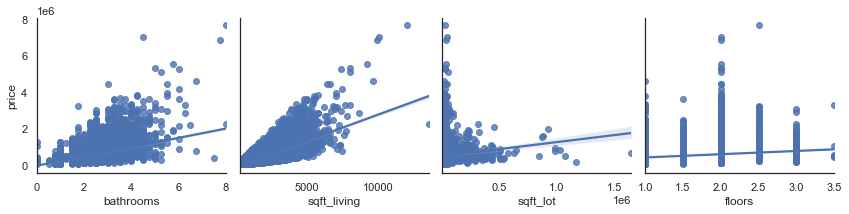

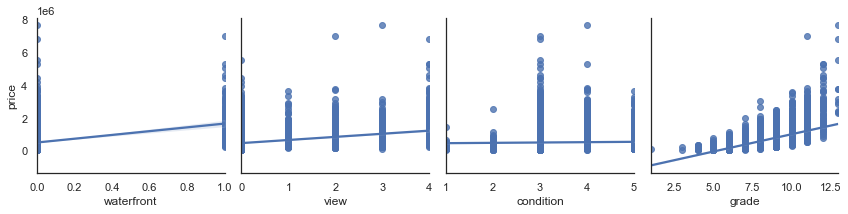

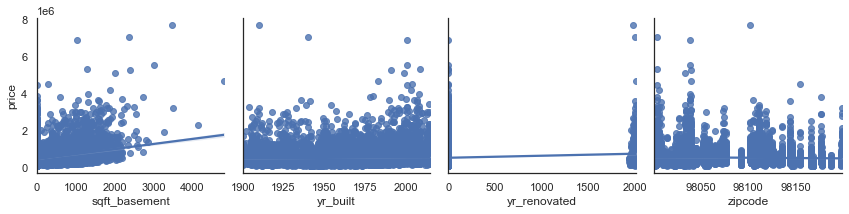

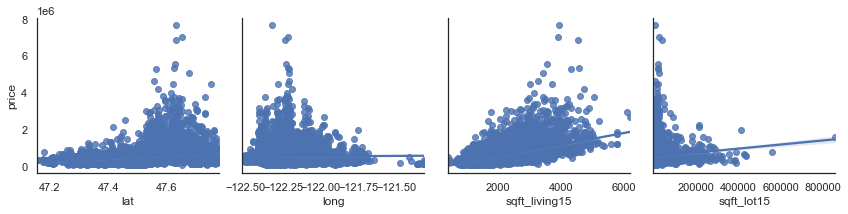

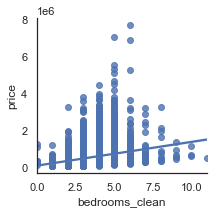

In [153]:
#break the colums into groups to plot 4 on a row at a time
n = 4
row_groups= [features_base[i:i+n] for i in range(0, len(features_base), n) ]

for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3, diag_kind=None)

In [145]:
def relationship(df, y):
    """
    Build plot to show relationship btween df values and y values
    params: 
            df - continuous, numeric values only
            y - continuous, numeric values only (y-axis)
    """
    fig = plt.figure(figsize=(25,20))
    for f,n in zip(df.columns, range(1,len(df.columns)+1)):
        #plt.subplot(int(len(df.columns)/2+0.5),2,n)
        #plt.title("{}".format(f))
        sns.jointplot(x=df[f], y = y, kind='reg')
    return plt.show()

<Figure size 1800x1440 with 0 Axes>

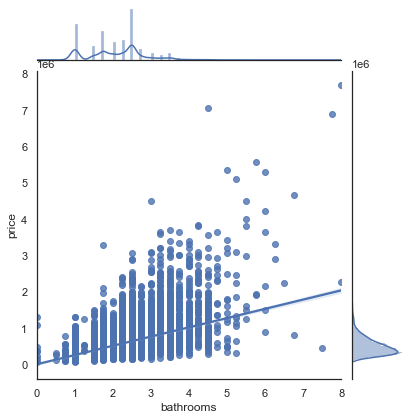

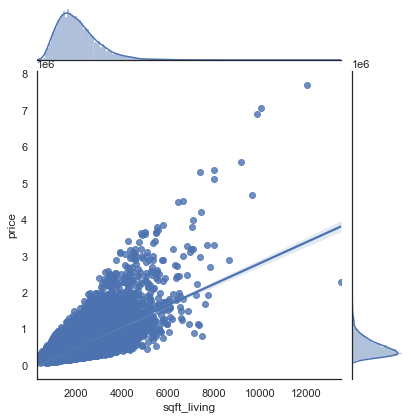

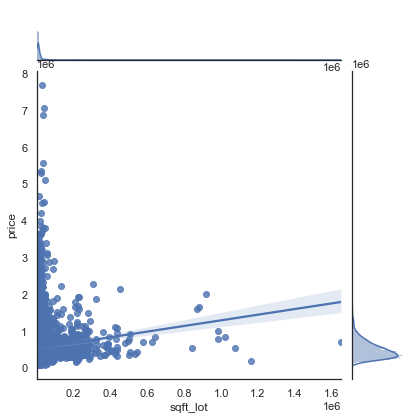

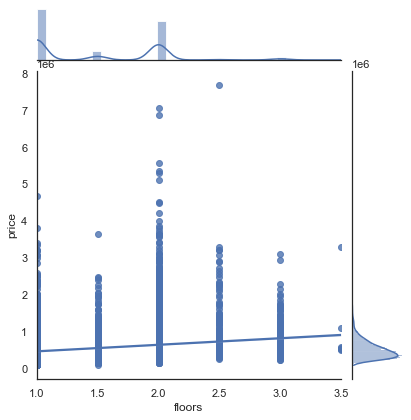

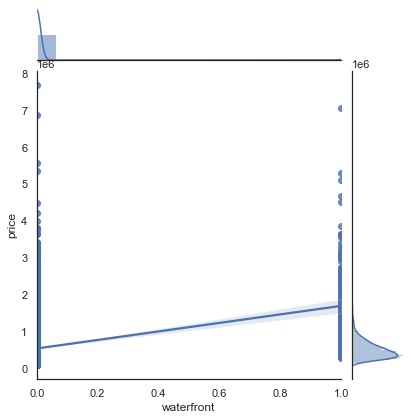

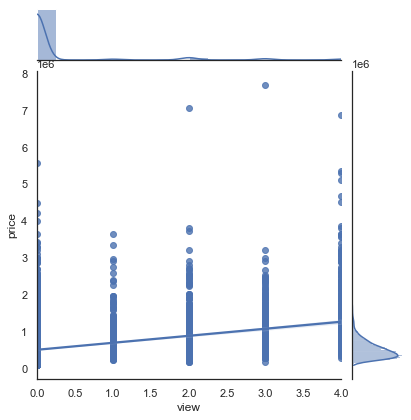

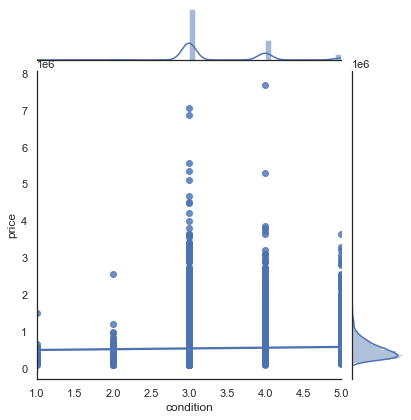

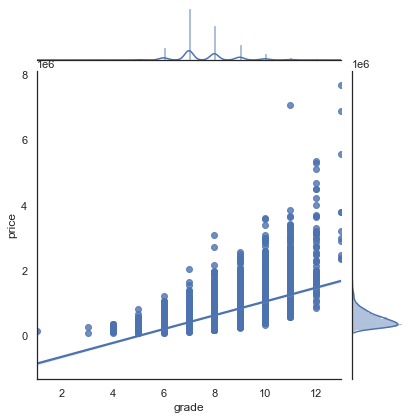

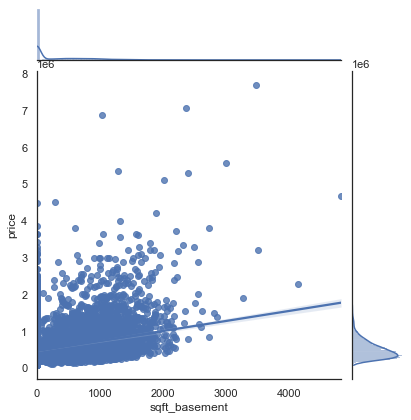

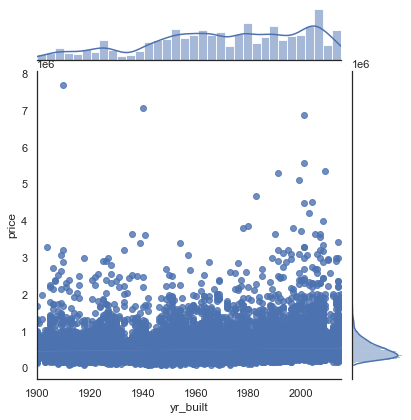

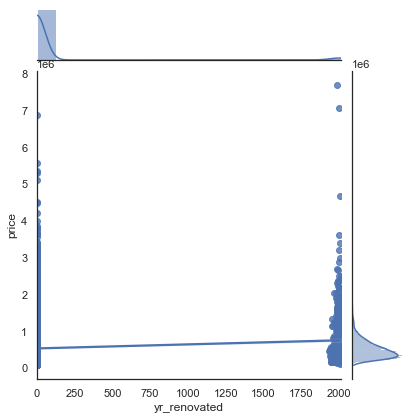

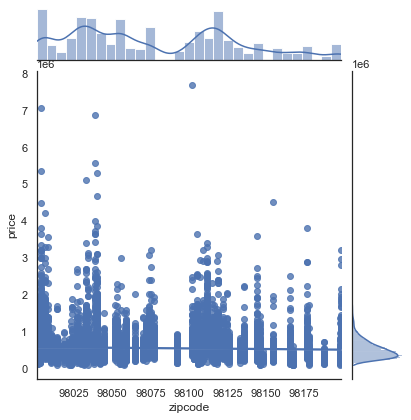

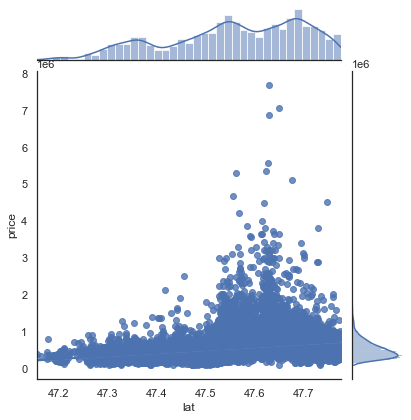

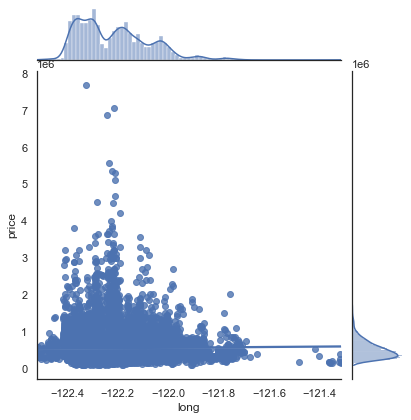

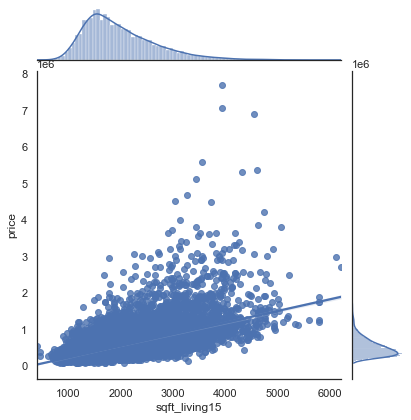

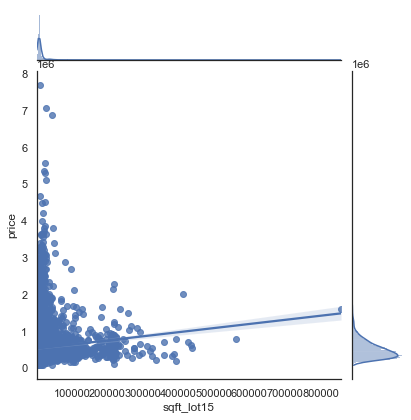

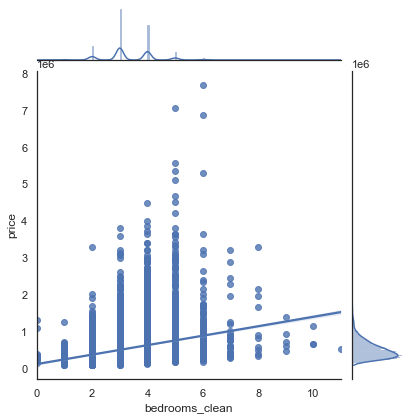

In [146]:
relationship(df[features_base], target)

<Figure size 1800x1440 with 0 Axes>

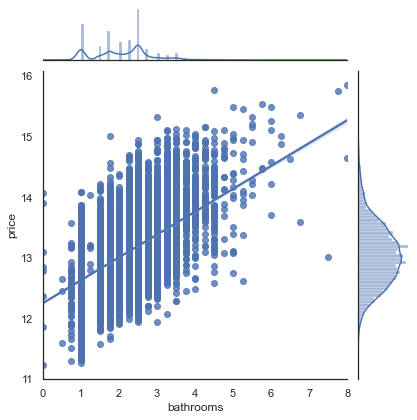

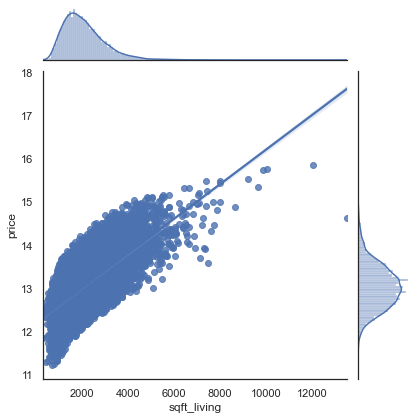

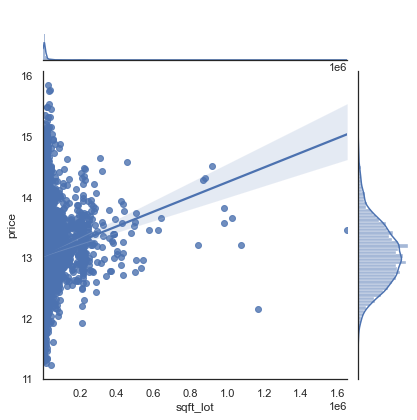

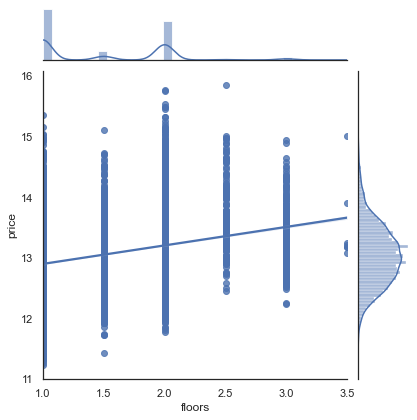

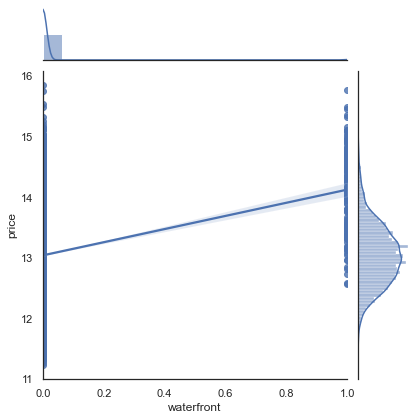

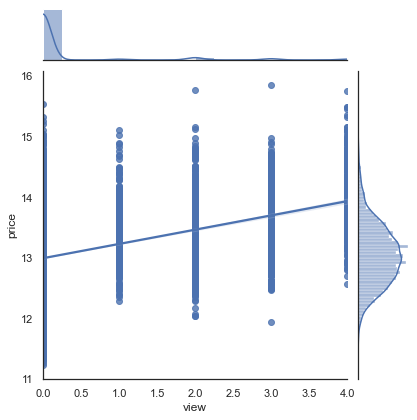

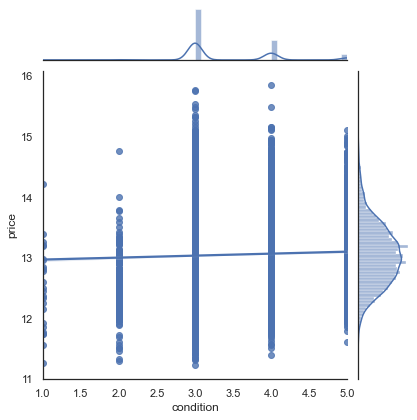

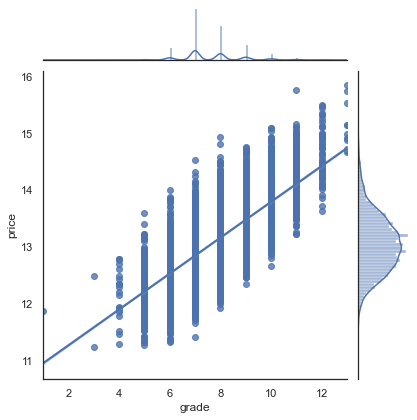

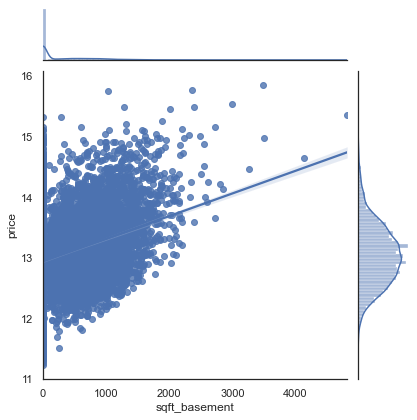

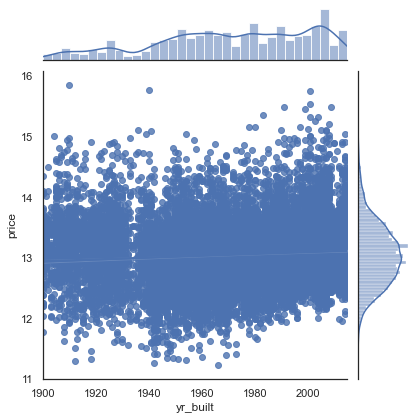

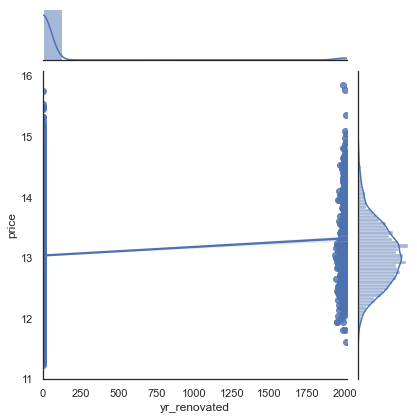

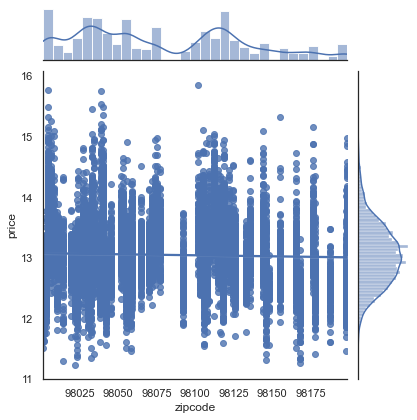

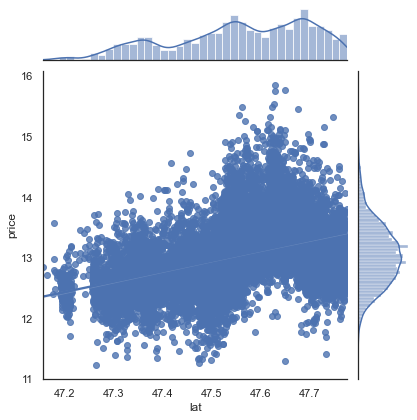

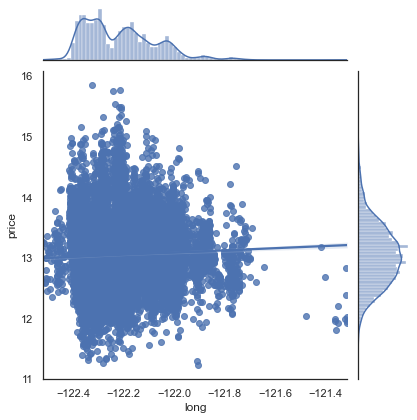

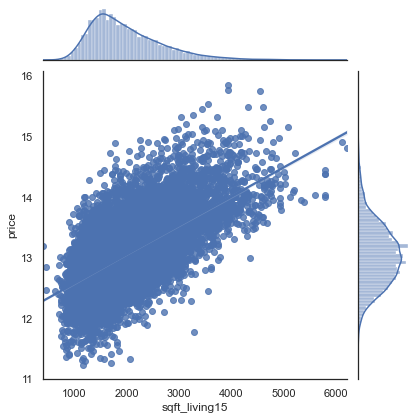

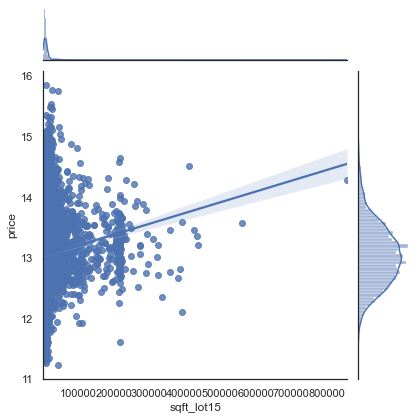

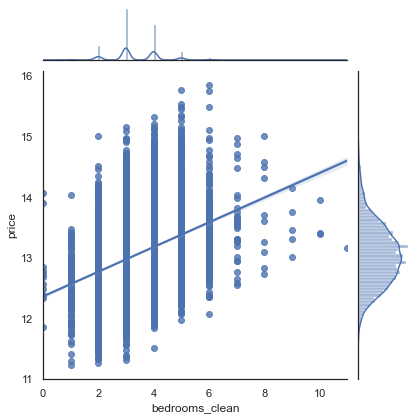

In [147]:
relationship(df[features_base], np.log(target))

## Base model

In [75]:
# dropped 'sqft_above'
features_base=['bathrooms', 'sqft_living',  # excl id and bedrooms and 'date', 
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', #'date_formatted',
       'bedrooms_clean']

df_features_base = df[features_base]

In [76]:
df_features_base

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_clean
0,2.25,2070,8893,2.0,0,0,4,8,0,1986,0,98058,47.4388,-122.162,2390,7700,4
1,3.00,2900,6730,1.0,0,0,5,8,1070,1977,0,98115,47.6784,-122.285,2370,6283,5
2,2.50,3770,10893,2.0,0,2,3,11,0,1997,0,98006,47.5646,-122.129,3710,9685,4
3,3.50,4560,14608,2.0,0,2,3,12,0,1990,0,98034,47.6995,-122.228,4050,14226,3
4,2.50,2550,5376,2.0,0,0,3,9,0,2004,0,98052,47.6647,-122.083,2250,4050,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,2.50,3240,9960,1.0,0,1,3,8,1220,1958,0,98008,47.5858,-122.112,2730,10400,5
17286,1.75,1300,4000,2.0,0,0,3,7,0,1948,0,98105,47.6687,-122.288,1350,4013,2
17287,1.00,1050,9876,1.0,0,0,3,7,0,1953,0,98028,47.7635,-122.262,1760,9403,3
17288,1.50,1900,43186,1.5,0,0,4,7,600,1971,0,98038,47.4199,-121.990,2080,108028,3


In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_features_base, target, test_size=0.2) # excl random_state=9,

In [78]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 200134.79900570522


In [79]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 223381.93804909103
Training:  200134 vs. Testing:  223381


/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

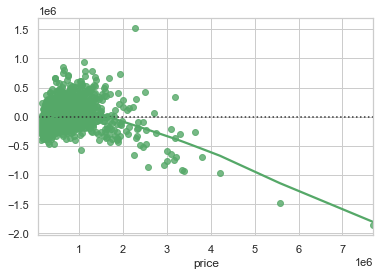

In [80]:
# Plot the residuals after fitting a linear model
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

## Will our model perform better if we try to predict the log of the price instead?

In [81]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [83]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

In [84]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)

In [85]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 654163.3918478943


In [86]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 307504.9646501927


In [87]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 307504.9646501927
Training:  654163 vs. Testing:  307504


/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

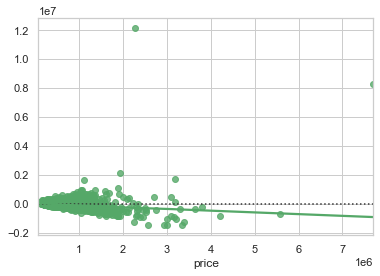

In [88]:
# Plot the residuals after fitting a linear model
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

## Generate 2nd degree Polynomial and Interaction features

In [89]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features_base)
poly2_columns = poly_2.get_feature_names(df_features_base.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_clean,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms bedrooms_clean,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living bedrooms_clean,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot bedrooms_clean,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors bedrooms_clean,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,waterfront bedrooms_clean,view^2,view condition,view grade,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,view bedrooms_clean,condition^2,condition grade,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,condition bedrooms_clean,grade^2,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,grade bedrooms_clean,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement bedrooms_clean,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_built bedrooms_clean,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated bedrooms_clean,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,zipcode bedrooms_clean,lat^2,lat long,lat sqft_living15,lat sqft_lot15,lat bedrooms_clean,long^2,long sqft_living15,long sqft_lot15,long bedrooms_clean,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 bedrooms_clean,sqft_lot15^2,sqft_lot15 bedrooms_clean,bedrooms_clean^2
0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,4.0,5.0625,4657.5,20009.25,4.5,0.0,0.0,9.0,18.0,0.0,4468.5,0.0,220630.5,106.73730,-274.8645,5377.5,17325.0,9.0,4284900.0,18408510.0,4140.0,0.0,0.0,8280.0,16560.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,8280.0,79085449.0,17786.0,0.0,0.0,35572.0,71144.0,0.0,17661498.0,0.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,35572.0,4.0,0.0,0.0,8.0,16.0,0.0,3972.0,0.0,196116.0,94.8776,-244.324,4780.0,15400.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.000,0.0,0.0,0.0,16.0,32.0,0.0,7944.0,0.0,392232.0,189.7552,-488.648,9560.0,30800.0,16.0,64.0,0.0,15888.0,0.0,784464.0,379.5104,-977.296,19120.0,61600.0,32.0,0.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,0.0,3944196.0,0.0,194743188.0,94213.4568,-242613.732,4746540.0,15292200.0,7944.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,9.615371e+09,4.651754e+06,-1.197896e+07,234358620.0,7.550466e+08,392232.0,2250.439745,-579

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

In [91]:
X_test.head()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_clean,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms bedrooms_clean,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living bedrooms_clean,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot bedrooms_clean,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors bedrooms_clean,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,waterfront bedrooms_clean,view^2,view condition,view grade,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,view bedrooms_clean,condition^2,condition grade,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,condition bedrooms_clean,grade^2,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,grade bedrooms_clean,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement bedrooms_clean,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_built bedrooms_clean,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated bedrooms_clean,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,zipcode bedrooms_clean,lat^2,lat long,lat sqft_living15,lat sqft_lot15,lat bedrooms_clean,long^2,long sqft_living15,long sqft_lot15,long bedrooms_clean,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 bedrooms_clean,sqft_lot15^2,sqft_lot15 bedrooms_clean,bedrooms_clean^2
13347,2.75,1610.0,11201.0,1.0,0.0,0.0,5.0,7.0,590.0,1982.0,0.0,98033.0,47.7024,-122.198,1610.0,9000.0,4.0,7.5625,4427.5,30802.75,2.75,0.0,0.0,13.75,19.25,1622.5,5450.5,0.0,269590.75,131.181600,-336.04450,4427.5,24750.0,11.00,2592100.0,18033610.0,1610.0,0.0,0.0,8050.0,11270.0,949900.0,3191020.0,0.0,157833130.0,76800.864,-196738.78,2592100.0,14490000.0,6440.0,125462401.0,11201.0,0.0,0.0,56005.0,78407.0,6608590.0,22200382.0,0.0,1.098068e+09,534314.5824,-1368739.798,18033610.0,100809000.0,44804.0,1.0,0.0,0.0,5.0,7.0,590.0,1982.0,0.0,98033.0,47.7024,-122.198,1610.0,9000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,25.0,35.0,2950.0,9910.0,0.0,490165.0,238.5120,-610.990,8050.0,45000.0,20.0,49.0,4130.0,13874.0,0.0,686231.0,333.9168,-855.386,11270.0,63000.0,28.0,348100.0,1169380.0,0.0,57839470.0,28144.416,-72096.82,949900.0,5310000.0,2360.0,3928324.0,0.0,194301406.0,94546.1568,-242196.436,3191020.0,17838000.0,7928.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,9.610469e+09,4.676

In [92]:
X_test.shape

(3458, 170)

In [93]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 152958.1521985908


In [94]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 155605.66709616693
Training:  152958 vs. Testing:  155605


## Generate 3rd degree Polynomial and Interaction features

In [122]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features_base)
poly3_columns = poly_3.get_feature_names(df_features_base.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [123]:
df_poly3.shape

(17290, 1139)

In [124]:
# instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(X_train, y_train)

y_train_pred = lm_3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [125]:
# use fitted model to predict on test data
y_pred = lm_3.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 155605.66709616693
Training:  152958 vs. Testing:  155605


## F Test

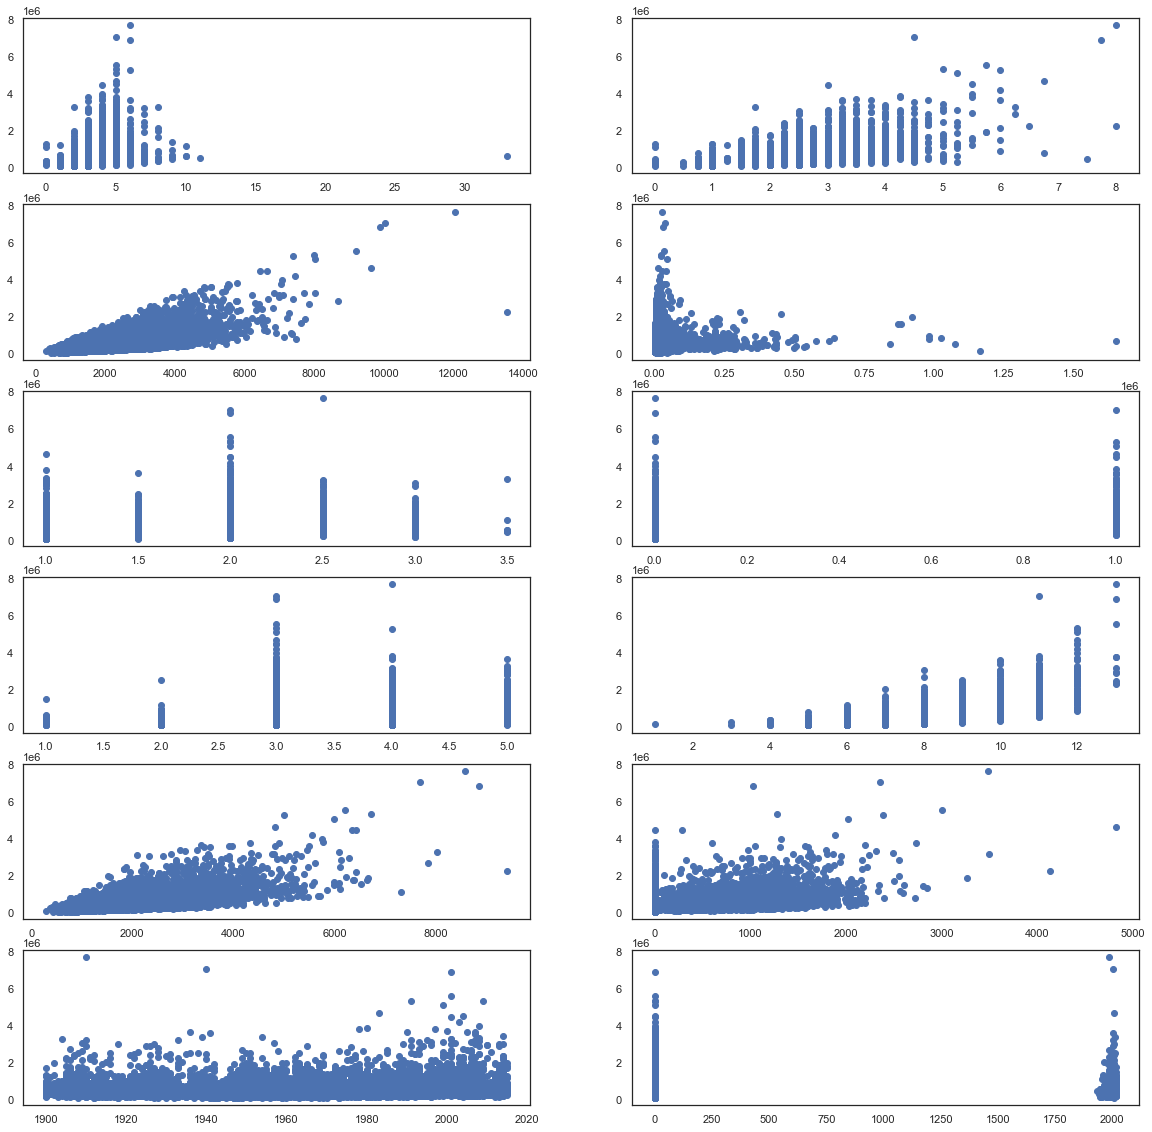

In [119]:
fig, ax = plt.subplots(6, 2, figsize = (20,20))
ax[0][0].scatter(df['bedrooms'], df['price'])
ax[0][1].scatter(df['bathrooms'], df['price'])
ax[1][0].scatter(df['sqft_living'], df['price'])
ax[1][1].scatter(df['sqft_lot'], df['price'])
ax[2][0].scatter(df['floors'], df['price'])
ax[2][1].scatter(df['waterfront'], df['price'])
ax[3][0].scatter(df['condition'], df['price'])
ax[3][1].scatter(df['grade'], df['price'])
ax[4][0].scatter(df['sqft_above'], df['price'])
ax[4][1].scatter(df['sqft_basement'], df['price'])
ax[5][0].scatter(df['yr_built'], df['price'])
ax[5][1].scatter(df['yr_renovated'], df['price'])

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(df['zipcode'], df['price'].mean(), yerr = df['price'].std())

In [ ]:
df.groupby('zipcode')['price'].mean()

In [ ]:
df['zipcode'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(['98001', '98002'], [df[df['zipcode'] == 98001]['price'].mean(), df[df['zipcode'] == 98002]['price'].mean()], yerr = [df[df['zipcode'] == 98001]['price'].std(), df[df['zipcode'] == 98002]['price'].std()])

In [ ]:
df[df['bedrooms'] > 7]

In [ ]:
df['bedrooms'].value_counts()

In [ ]:
df[df['bedrooms_clean'] == 33]

In [ ]:
df['bedrooms_clean'] = df['bedrooms_clean'].replace({33:3})

In [ ]:
df['bedrooms_clean'].value_counts()

In [ ]:
df.columns

In [ ]:
# price dependent on bedrooms_clean+bathrooms+sqft_living+grade
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade', data = df).fit()
lr_model.summary()

In [ ]:
# added zipcode
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade+zipcode', data = df).fit()
lr_model.summary()

In [ ]:
# added condition
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade+zipcode+condition', data = df).fit()
lr_model.summary()

In [ ]:
# added condition
from statsmodels.formula.api import ols
lr_model = ols(formula = 'price~bedrooms_clean+bathrooms+sqft_living+grade+zipcode+condition+sqft_basement', data = df).fit()
lr_model.summary()

In [ ]:
df.columns

In [ ]:
features_0 = ['bedrooms_clean', 'bathrooms','sqft_living','grade','zipcode', 'condition', 'sqft_basement']

In [ ]:
df_features = df[features_0]
target = df['price']

In [ ]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2) # random_state=34,

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

In [ ]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [ ]:
y_train_pred = lm.predict(X_train)

In [ ]:
#import the metrics module from sklearn
from sklearn import metrics

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error:' , train_rmse)

In [ ]:
price_std = target.std()

print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

In [ ]:
print('Root Mean Squared Error Z:' , test_rmse/price_std)

In [ ]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [ ]:
residuals = (y_test- y_pred)

In [ ]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [ ]:
waterfront = df[df['waterfront'] == 1]['price']
no_waterfront = df[df['waterfront'] == 0]['price']

In [ ]:
import scipy.stats as scs
t, p = scs.ttest_ind(waterfront, no_waterfront)
p_value = p
p_value

In [ ]:
waterfront.mean()

In [ ]:
no_waterfront.mean()

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [ ]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [ ]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [ ]:
#your code here 

### 5.4) Fit the model to the training data.

In [ ]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [ ]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [ ]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [ ]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [ ]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/